# **Data driven Threat Hunting for DNS based C2**

We have started with a PCAP with 1 days’ worth of Network traffic
<br>
PCAPS can be found [here] (https://activecm.github.io/threat-hunting-labs/)
<br>
We will create a CSV from the PCAP using Wireshark


In [1]:
import pandas as pd
pd.options.display.max_columns = None
df = pd.read_csv("AC_PCAPS\\sample-200.csv")
df.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,LCFCHeFe_06:cb:e8,Broadcast,ARP,42,Who has 10.55.100.1? Tell 10.55.100.197
1,2,0.031180,10.55.182.100,10.233.233.5,TCP,66,14291 > 80 [SYN] Seq=0 Win=64240 Len=0 MSS=1...
2,3,0.219990,192.168.88.2,165.227.88.15,DNS,103,Standard query 0xa7b9 TXT 6dde0175375169c68f.d...
3,4,0.289972,165.227.88.15,192.168.88.2,DNS,123,Standard query response 0xa7b9 TXT 6dde0175375...
4,5,1.294809,192.168.88.2,165.227.88.15,DNS,103,Standard query 0x40ac TXT 0b320175375169c68f.d...


It seems that a lot of data has been lost by doing a simple export to CSV from the pcap in Wireshark
<br>
In order to prevent this data loss we can transform our PCAP into Zeek output first using

**zeek -r <PCAP FILE>**
    
Then convert our DNS log file into a data frame using [ZAT](https://github.com/SuperCowPowers/zat)
<br>
We will also want to add a new column for the length of the DNS query sent as this could be a potential indicator of interest

We first install zat using pip
    
**pip install zat**


In [2]:
import os
from zat.log_to_dataframe import LogToDataFrame
df = LogToDataFrame().create_dataframe('AC_PCAPS\dns.log')
# add query length
df['query_length'] = df['query'].str.len()
df.to_csv('AC_PCAPS\dns.csv')
df.head()

,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,trans_id,rtt,query,qclass,qclass_name,qtype,qtype_name,rcode,rcode_name,AA,TC,RD,RA,Z,answers,TTLs,rejected,query_length
ts,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-30 18:14:02.279652096,C8lpV845NK9WJrVD9f,192.168.88.2,55638,165.227.88.15,53,udp,42937,0 days 00:00:00.069982,6dde0175375169c68f.dnsc.r-1x.com,1,C_INTERNET,16,TXT,0,NOERROR,F,F,T,T,0,TXT 18 302f017537c68f5169,60.000000,F,32
2018-01-30 18:14:03.354470912,CfOwYc3SGtiJesTv0e,192.168.88.2,28736,165.227.88.15,53,udp,16556,0 days 00:00:00.078779,0b320175375169c68f.dnsc.r-1x.com,1,C_INTERNET,16,TXT,0,NOERROR,F,F,T,T,0,TXT 18 c27a017537c68f5169,60.000000,F,32
2018-01-30 18:14:04.438942976,CcCHMY34MxaNKA4S5k,192.168.88.2,42647,165.227.88.15,53,udp,7845,0 days 00:00:00.073451,344b0175375169c68f.dnsc.r-1x.com,1,C_INTERNET,16,TXT,0,NOERROR,F,F,T,T,0,TXT 18 67f2017537c68f5169,60.000000,F,32
2018-01-30 18:14:05.517671936,CBIStC4iQfxUrjuddi,192.168.88.2,20440,165.227.88.15,53,udp,39375,0 days 00:00:00.064032,0f370175375169c68f.dnsc.r-1x.com,1,C_INTERNET,16,TXT,0,NOERROR,F,F,T,T,0,TXT 18 8759017537c68f5169,60.000000,F,32
2018-01-30 18:14:06.587420928,C4p4Mu2pG0B5kHdONa,192.168.88.2,39912,165.227.88.15,53,udp,65170,0 days 00:00:00.071484,251e0175375169c68f.dnsc.r-1x.com,1,C_INTERNET,16,TXT,0,NOERROR,F,F,T,T,0,TXT 18 cf5d017537c68f5169,60.000000,F,32


We can now see that we have farm more data points per record than the original CSV export.
<br>
Most of these columns are self-explanatory however for the more niche ones here is a brief explanation.

**aa** = Authoritative Answer ( Does not mean 100% the answer has come from an authoritative server, as cached results that have still come all the way from an authoritative server will still have this flag set )
<br>
**tc** = Truncation (truncated due to length greater than that permitted on the transmission channel)
<br>
**rd** = Recursion Desired
<br>
**ra** = Recursion Available
<br>
**z** =  Reserved for future use. Must be zero

We can now get some very basic statistics back from our data frame and see if there is anything of interest


In [3]:
df.describe(include="all")

,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,trans_id,rtt,query,qclass,qclass_name,qtype,qtype_name,rcode,rcode_name,AA,TC,RD,RA,Z,answers,TTLs,rejected,query_length
count,315189,315189,315189.000000,315189,315189.0,315189,315189.000000,194668,315189,315189.0,315189,315189.000000,315189,201250.000000,201250,315189,315189,315189,315189,315189.000000,194668,194668,315189,315189.000000
unique,312487,3,NaN,1302,NaN,1,NaN,NaN,65086,NaN,1,NaN,8,NaN,3,2,1,2,2,NaN,78523,96,1,NaN
top,CCsKHlqwKWEivII5i,10.55.200.10,NaN,165.227.88.15,NaN,udp,NaN,NaN,us-scproxy.alibaba.com.gds.alibabadns.com,NaN,C_INTERNET,NaN,A,NaN,NOERROR,T,F,F,F,NaN,"us-scproxy.alibaba.com,us-scproxy.alibaba.com....",86400.000000,F,NaN
freq,3,131180,NaN,108423,NaN,315189,NaN,NaN,1457,NaN,315189,NaN,199818,NaN,201225,194362,315189,247876,314883,NaN,1190,108093,315189,NaN
mean,NaN,NaN,47380.528470,NaN,53.0,NaN,32791.749817,0 days 00:00:00.071490098,NaN,1.0,NaN,6.752361,NaN,0.000343,NaN,NaN,NaN,NaN,NaN,0.372589,NaN,NaN,NaN,27.684221
std,NaN,NaN,14192.789715,NaN,0.0,NaN,18919.426172,0 days 00:00:00.121339903,NaN,0.0,NaN,7.768443,NaN,0.031126,NaN,NaN,NaN,NaN,NaN,0.483495,NaN,NaN,NaN,9.588116
min,NaN,NaN,1031.000000,NaN,53.0,NaN,1.000000,0 days 00:00:00.011546,NaN,1.0,NaN,1.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,2.000000
25%,NaN,NaN,45488.000000,NaN,53.0,NaN,16400.000000,0 days 00:00:00.058706,NaN,1.0,NaN,1.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,21.000000
50%,NaN,NaN,53500.000000,NaN,53.0,NaN,32811.000000,0 days 00:00:00.065521499,NaN,1.0,NaN,1.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,30.000000
75%,NaN,NaN,55532.000000,NaN,53.0,NaN,49181.000000,0 days 00:00:00.072813,NaN,1.0,NaN,16.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,32.000000


We only have 3 source hosts that are making DNS queries.
<br>
With 10.55.200.10 making the most.

We have 1302 destination hosts.
<br>
With 165.227.88.15 receiving the most.

Out of 315189 queries we have only 65086 unique queries.
<br>
Given this is from 3 source hosts, assuming they themselves are not DNS servers, then this may be considered low.

We see 8 different query types with a record queries taking the top spot.

Response codes seem to be nearly exclusively NOERROR, however 2 other codes are in the dataset.

Around 2/3 responses are flagged as being from an authoritative source.
<br>
There is no Truncation.
<br>
The majority of queries desire recursion and nearly always recursion is available.

Similar to the queries for answers out of 194668 we have only 78523.
<br>
Given this is from 3 source hosts, assuming they themselves are not DNS servers, then this may be considered low.

Out of 194668 TTL values we have 96 unique values.

Based on the query length percentiles we can see that the majority of queries are around 26-32.
<br>
We also have some extreme outliers as shown by the max of 125.
<br>

<AxesSubplot:>

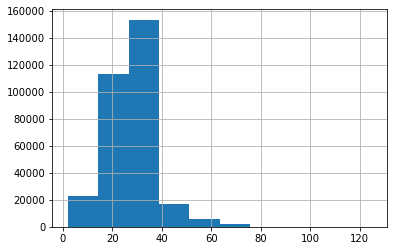

In [4]:
df["query_length"].hist()

Now that we have done some basic analysis we can move on to something a little more in-depth.

# Principle component analysis (PCA)

PCA tries to calculate principle components as vectors in your dataset.

Principle components reduce noise in your dataset by finding the most influential features in the data set.
<br>
This is the first application for PCA.

**Improved training time when using ML Algorithms**

By reducing the dataset down to a couple of principle components we get the second application for PCA.

**Visualising multidimensional data as 2/3 dimensional plots**

For this Hunt we will be using it to improve training time
<br>
So first we define our features.
<br>
Typically you would standardise the features to make sure one was not given more weight than others
<br>
However we only have one numerical feature here.


In [5]:
features = ['AA', 'RA', 'RD', 'TC', 'Z', 'rejected', 'proto', 'qtype_name', 'rcode_name', 'query_length']
feature_df = df[features]

feature_df.head()

,AA,RA,RD,TC,Z,rejected,proto,qtype_name,rcode_name,query_length
ts,,,,,,,,,,
2018-01-30 18:14:02.279652096,F,T,T,F,0,F,udp,TXT,NOERROR,32
2018-01-30 18:14:03.354470912,F,T,T,F,0,F,udp,TXT,NOERROR,32
2018-01-30 18:14:04.438942976,F,T,T,F,0,F,udp,TXT,NOERROR,32
2018-01-30 18:14:05.517671936,F,T,T,F,0,F,udp,TXT,NOERROR,32
2018-01-30 18:14:06.587420928,F,T,T,F,0,F,udp,TXT,NOERROR,32


We now want to convert our feature data frame to a matrix and standardise the data within it

In [6]:
from zat import dataframe_to_matrix

# https://github.com/SuperCowPowers/zat/blob/7f0de8bb052e8c84ab9bd00f195514d957eac9ec/zat/dataframe_to_matrix.py

def fit_transform(self, input_df, normalize=True, nan_replace=-999, copy=True):
        """Convert the dataframe to a matrix (numpy ndarray)
        Args:
            input_df (dataframe): The dataframe to convert
            normalize (bool): Boolean flag to normalize numeric columns (default=True)
        """
        self.nan_replace = nan_replace

        # Copy the dataframe (if wanted)
        _internal_df = input_df.copy() if copy else input_df

        # Convert object columns to categorical
        self.object_to_categorical(_internal_df)

        # Convert categorical NaNs
        self.fit_category_nans(_internal_df)

        # Lock categories to specific values (important for train/predict consistency)
        self.lock_categorical(_internal_df)

        # Sanity Check
        self.sanity_check_categorical(_internal_df)

        # Normalize numeric columns (mean normalize, sometimes called 'standardizing')
        if normalize:
            self.normalize_numeric(_internal_df)

        # Remove any numerical NaNs (categorical NaNs were removed above)
        for column in _internal_df.select_dtypes(include='number').columns:
            _internal_df[column].fillna(self.nan_replace, inplace=True)

        # Drop any columns that aren't numeric or categorical
        for column in list(_internal_df.select_dtypes(exclude=['number', 'category']).columns):
            print('Dropping {:s} column...'.format(column))
        _internal_df = _internal_df.select_dtypes(include=['number', 'category'])

        # Capture all the column/dtype information from the dataframe
        self.column_names = _internal_df.columns.to_list()
        for column in _internal_df.columns:
            self.dtype_map[column] = _internal_df[column].dtype

        # Now with every thing setup, call the dummy_encoder, convert to ndarray and return
        return pd.get_dummies(_internal_df).to_numpy(dtype=np.float32)

df_matrix = dataframe_to_matrix.DataFrameToMatrix().fit_transform(feature_df)

print(df_matrix)

Normalizing column Z...
Normalizing column query_length...
[[0.         0.24390244 1.         ... 0.         0.         0.        ]
 [0.         0.24390244 1.         ... 0.         0.         0.        ]
 [0.         0.24390244 1.         ... 0.         0.         0.        ]
 ...
 [1.         0.24390244 0.         ... 0.         0.         0.        ]
 [1.         0.24390244 0.         ... 0.         0.         0.        ]
 [1.         0.24390244 0.         ... 0.         0.         0.        ]]


<br>
We can now calculate our PCA
<br>

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit_transform(df_matrix)
print(pca)

[[ 0.30914298  0.95545626]
 [ 0.30916741  0.9481548 ]
 [ 0.30916747  0.9481439 ]
 ...
 [-1.2747705   0.49432603]
 [-1.2747706   0.49432608]
 [-1.2747706   0.49432608]]


Now that we have completed our PCA analysis it is time to move on to the next algorithm we will be using.

# K-means

K-means is a clustering algorithm.
<br>
Clustering is a technique where upon taking a seemingly disparate data set you find commonalities between the data points.
<br>
These commonalities are then used to group the data points, this allows the analyst to break up a data set to either conduct further analysis or draw some conclusions.

The way this is done with K-means is it will chose random initial points based on the number of clusters you are looking to find in the data.
<br>
It then has two distinct steps, an E-step and an M-step.
<br>
The E-step assigns the nearest points to the initialised centre to the group.
<br>
The M-step then re-sets the cluster centre to the mean of the assigned data points.
<br>
This is then iterated over until all data points are assigned to a group.

Now that we have a basic understanding of what K-means is doing we can put it to practise.


In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5).fit_predict(df_matrix)
print(kmeans)

[1 1 1 ... 2 2 2]


<br>
We have our ML results and can add them back into our origional Dataframe
<br>

In [9]:
import numpy as np

# Helper method for scatter/beeswarm plot
def jitter(arr):
    stdev = .02*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev

df['x'] = jitter(pca[:, 0]) # PCA X Column
df['y'] = jitter(pca[:, 1]) # PCA Y Column
df['cluster'] = kmeans
df.head()

,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,trans_id,rtt,query,qclass,qclass_name,qtype,qtype_name,rcode,rcode_name,AA,TC,RD,RA,Z,answers,TTLs,rejected,query_length,x,y,cluster
ts,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-30 18:14:02.279652096,C8lpV845NK9WJrVD9f,192.168.88.2,55638,165.227.88.15,53,udp,42937,0 days 00:00:00.069982,6dde0175375169c68f.dnsc.r-1x.com,1,C_INTERNET,16,TXT,0,NOERROR,F,F,T,T,0,TXT 18 302f017537c68f5169,60.000000,F,32,0.419519,1.008791,1
2018-01-30 18:14:03.354470912,CfOwYc3SGtiJesTv0e,192.168.88.2,28736,165.227.88.15,53,udp,16556,0 days 00:00:00.078779,0b320175375169c68f.dnsc.r-1x.com,1,C_INTERNET,16,TXT,0,NOERROR,F,F,T,T,0,TXT 18 c27a017537c68f5169,60.000000,F,32,0.335559,0.996546,1
2018-01-30 18:14:04.438942976,CcCHMY34MxaNKA4S5k,192.168.88.2,42647,165.227.88.15,53,udp,7845,0 days 00:00:00.073451,344b0175375169c68f.dnsc.r-1x.com,1,C_INTERNET,16,TXT,0,NOERROR,F,F,T,T,0,TXT 18 67f2017537c68f5169,60.000000,F,32,0.328491,0.875177,1
2018-01-30 18:14:05.517671936,CBIStC4iQfxUrjuddi,192.168.88.2,20440,165.227.88.15,53,udp,39375,0 days 00:00:00.064032,0f370175375169c68f.dnsc.r-1x.com,1,C_INTERNET,16,TXT,0,NOERROR,F,F,T,T,0,TXT 18 8759017537c68f5169,60.000000,F,32,0.427118,0.869279,1
2018-01-30 18:14:06.587420928,C4p4Mu2pG0B5kHdONa,192.168.88.2,39912,165.227.88.15,53,udp,65170,0 days 00:00:00.071484,251e0175375169c68f.dnsc.r-1x.com,1,C_INTERNET,16,TXT,0,NOERROR,F,F,T,T,0,TXT 18 cf5d017537c68f5169,60.000000,F,32,0.338815,0.934146,1


We now want to group our results by their relent clusters.

In [10]:
show_fields = ['query', 'qtype_name', 'AA', 'answers', 'query_length', 'x', 'y', 'cluster']
cluster_groups = df[show_fields].groupby('cluster')
cluster_groups.head()

,query,qtype_name,AA,answers,query_length,x,y,cluster
ts,,,,,,,,
2018-01-30 18:14:02.279652096,6dde0175375169c68f.dnsc.r-1x.com,TXT,F,TXT 18 302f017537c68f5169,32,0.419519,1.008791,1
2018-01-30 18:14:03.354470912,0b320175375169c68f.dnsc.r-1x.com,TXT,F,TXT 18 c27a017537c68f5169,32,0.335559,0.996546,1
2018-01-30 18:14:04.438942976,344b0175375169c68f.dnsc.r-1x.com,TXT,F,TXT 18 67f2017537c68f5169,32,0.328491,0.875177,1
2018-01-30 18:14:05.517671936,0f370175375169c68f.dnsc.r-1x.com,TXT,F,TXT 18 8759017537c68f5169,32,0.427118,0.869279,1
2018-01-30 18:14:06.587420928,251e0175375169c68f.dnsc.r-1x.com,TXT,F,TXT 18 cf5d017537c68f5169,32,0.338815,0.934146,1
2018-01-30 18:15:46.323323904,v10-win.vortex.data.microsoft.com.akadns.net,A,T,geo.vortex.data.microsoft.com.akadns.net,44,-0.279906,-0.871748,0
2018-01-30 18:15:50.770251008,v10-win.vortex.data.microsoft.com.akadns.net,A,T,geo.vortex.data.microsoft.com.akadns.net,44,-0.312357,-0.910241,0
2018-01-30 18:15:55.808342016,atsv2-fp.wg1.b.yahoo.com,A,T,"98.138.252.39,98.139.180.180,98.139.180.181,98...",24,-0.371086,-0.969744,0
2018-01-30 18:15:56.583076096,s.gycs.b.yahoodns.net,A,T,"69.147.92.12,69.147.92.11",21,-0.389733,-0.966219,0


We can now visualise our clusters

In [11]:
pd.set_option('display.width', 1000)
for key, group in cluster_groups:
    print(group.head(), '\n')
    print('Rows in Cluster: {:d}'.format(len(group)))

                                                                      query qtype_name AA                                            answers  query_length         x         y  cluster
ts                                                                                                                                                                                     
2018-01-30 18:15:46.323323904  v10-win.vortex.data.microsoft.com.akadns.net          A  T           geo.vortex.data.microsoft.com.akadns.net            44 -0.279906 -0.871748        0
2018-01-30 18:15:50.770251008  v10-win.vortex.data.microsoft.com.akadns.net          A  T           geo.vortex.data.microsoft.com.akadns.net            44 -0.312357 -0.910241        0
2018-01-30 18:15:55.808342016                      atsv2-fp.wg1.b.yahoo.com          A  T  98.138.252.39,98.139.180.180,98.139.180.181,98...            24 -0.371086 -0.969744        0
2018-01-30 18:15:56.583076096                         s.gycs.b.yahoodns.net     

<br>
<br>
Looking at the data above I would say that cluster 1 and cluster 3 are both worth taking a look at looking at.
<br>
They show similarities from both using the dnsc.r-1x.com domain with what seems to be machine generated domains.

Based only on the above data it would seem that cluster 3 is dealing with our continuous polls for C2 where no instructions are given.
<br>
This is shown by the consistent query length of 32, a poll coming out nearly every second with a little jitter, and the patterns of "c68f" and "5169" found in both the query and answers.


Then cluster 1 is showing the polls with instructions. This is based on the inconsistent query length as well as no clear pattern in the answers or queries, these attributes combined suggesting data transfer and/or instructions being passed between C2 server and handler.

However we should look closer before fully drawing these conclusion, we will start with,


# Cluster 3


In [12]:
df_3 = df.loc[df['cluster'] == 3]
df_3

,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,trans_id,rtt,query,qclass,qclass_name,qtype,qtype_name,rcode,rcode_name,AA,TC,RD,RA,Z,answers,TTLs,rejected,query_length,x,y,cluster
ts,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-30 18:15:53.943943936,C4L8zB4EYAtgf9kzkg,10.55.200.11,56403,205.251.194.64,53,udp,63208,NaT,www.alexa.com,1,C_INTERNET,1,A,<NA>,NaN,F,F,F,F,0,NaN,NaN,F,13,1.227848,-0.106246,3
2018-01-30 18:15:56.344319232,C7Bbcr1vyNYFqKglkc,10.55.200.11,57292,68.180.131.16,53,udp,23064,NaT,mbp.yimg.com,1,C_INTERNET,1,A,<NA>,NaN,F,F,F,F,0,NaN,NaN,F,12,1.223548,-0.104033,3
2018-01-30 18:15:56.512006144,C7z8j7TPI4AuMQklg,10.55.200.11,56707,68.180.131.16,53,udp,3762,NaT,s.yimg.com,1,C_INTERNET,1,A,<NA>,NaN,F,F,F,F,0,NaN,NaN,F,10,1.187590,-0.099022,3
2018-01-30 18:15:56.704037888,C1002n1slQbeMSmDr,10.55.200.11,57618,68.180.131.16,53,udp,33966,NaT,s3.yimg.com,1,C_INTERNET,1,A,<NA>,NaN,F,F,F,F,0,NaN,NaN,F,11,1.186091,-0.112086,3
2018-01-30 18:15:56.824014848,CEbqbc3oD9mN7t9mlj,10.55.200.11,55317,68.180.131.16,53,udp,56553,NaT,s2.yimg.com,1,C_INTERNET,1,A,<NA>,NaN,F,F,F,F,0,NaN,NaN,F,11,1.069690,-0.108965,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-31 18:12:18.907376128,C185Mc2ZkrLsLeKXbi,10.55.200.10,53649,198.11.138.245,53,udp,60917,NaT,gdsns1.taobao.com,1,C_INTERNET,1,A,<NA>,NaN,F,F,F,F,0,NaN,NaN,F,17,1.188676,-0.093441,3
2018-01-31 18:12:18.907453184,CtLQWr2r9ZsWtnLBYl,10.55.200.10,53215,69.171.239.12,53,udp,13666,NaT,b.ns.xx.fbcdn.net,1,C_INTERNET,1,A,<NA>,NaN,F,F,F,F,0,NaN,NaN,F,17,1.171674,-0.062018,3
2018-01-31 18:12:21.626156032,C5z8Fm4jObou7kwMYh,10.55.200.10,52720,209.112.113.33,53,udp,17627,NaT,va.v.liveperson.net,1,C_INTERNET,1,A,<NA>,NaN,F,F,F,F,0,NaN,NaN,F,19,1.210724,-0.127183,3


<br>
<br>
There is still some noise in this data frame from other sources so let’s filter that out
<br>
<br>


In [13]:
df_3[df_3['query'].str.contains(".dnsc.r-1x.com")]

,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,trans_id,rtt,query,qclass,qclass_name,qtype,qtype_name,rcode,rcode_name,AA,TC,RD,RA,Z,answers,TTLs,rejected,query_length,x,y,cluster
ts,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-30 18:33:51.177275904,Ces1zebSNGJJZ5T4l,192.168.88.2,32472,165.227.88.15,53,udp,18771,NaT,512d0005b337460021636f6d6d616e642073657373696f...,1,C_INTERNET,16,TXT,<NA>,NaN,F,F,F,F,1,NaN,NaN,F,64,0.247717,1.483589,3
2018-01-30 18:58:24.971857152,CTXB2r4SrRIReL5l14,192.168.88.2,38532,165.227.88.15,53,udp,26168,NaT,39d90176d26bcf661d382c3033372c3337362062797465...,1,C_INTERNET,16,TXT,<NA>,NaN,F,F,F,F,1,NaN,NaN,F,123,0.207618,1.364120,3
2018-01-30 18:58:36.544091904,CgQppp2jt2xC4Mpli3,192.168.88.2,40804,165.227.88.15,53,udp,39583,NaT,66280176d26bfc662a636420446f63756d656e74730a0d...,1,C_INTERNET,16,TXT,<NA>,NaN,F,F,F,F,1,NaN,NaN,F,125,0.282037,1.348714,3
2018-01-30 18:58:58.019342848,CVLS54nUWQQroDGZ8,192.168.88.2,28351,165.227.88.15,53,udp,11130,NaT,13e80176d26eb46641636420446f776e6c6f6164730a0d...,1,C_INTERNET,16,TXT,<NA>,NaN,F,F,F,F,1,NaN,NaN,F,125,0.165453,1.406365,3
2018-01-30 19:35:26.335230976,C764P74JqbUfXnTad3,192.168.88.2,38921,165.227.88.15,53,udp,39753,NaT,1c260176d2c0a0669c736167652e0d0a0d0a433a5c5573...,1,C_INTERNET,16,TXT,<NA>,NaN,F,F,F,F,1,NaN,NaN,F,113,0.330564,1.347786,3
2018-01-30 20:06:28.798391040,CuZUPP162Ei0ELmfGe,192.168.88.2,24362,165.227.88.15,53,udp,34564,NaT,54730176d2f1ce66e2.dnsc.r-1x.com,1,C_INTERNET,16,TXT,<NA>,NaN,F,F,F,F,1,NaN,NaN,F,32,0.292116,1.315714,3
2018-01-30 20:06:28.798400000,C5DFja4IPQFbRmEJj2,192.168.88.2,55687,165.227.88.15,53,udp,33811,NaT,31e6011239458783cf.dnsc.r-1x.com,1,C_INTERNET,16,TXT,<NA>,NaN,F,F,F,F,1,NaN,NaN,F,32,0.345524,1.420676,3
2018-01-30 22:41:11.341424896,C30JWr2EnZ8RR5cEv3,192.168.88.2,40497,165.227.88.15,53,udp,45717,NaT,1093011239458783cf.dnsc.r-1x.com,1,C_INTERNET,16,TXT,<NA>,NaN,F,F,F,F,1,NaN,NaN,F,32,0.209576,1.369974,3
2018-01-31 02:02:14.652986112,Cb87hC4T9V5Yg3CWzk,192.168.88.2,48233,165.227.88.15,53,udp,43718,NaT,0f2e011239458783cf.dnsc.r-1x.com,1,C_INTERNET,16,TXT,<NA>,NaN,F,F,F,F,1,NaN,NaN,F,32,0.234989,1.396530,3


<br>
<br>
So we are now down to only 409 queries over a time span of 7 minutes, from an original data set over 24 hours.
<br>
Given there are 420 seconds in 7 minutes and we originally thought this was roughly a 1 second polling time this seems to support that thought.
<br>
<br>
It does seem though towards the end of the data frame communications were not being responded to, we can take a closer look at this below.


In [14]:
df_3_null = df_3[df_3['query'].str.contains(".dnsc.r-1x.com")]
df_3_null[df_3_null['answers'].isnull()]

,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,trans_id,rtt,query,qclass,qclass_name,qtype,qtype_name,rcode,rcode_name,AA,TC,RD,RA,Z,answers,TTLs,rejected,query_length,x,y,cluster
ts,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-30 18:33:51.177275904,Ces1zebSNGJJZ5T4l,192.168.88.2,32472,165.227.88.15,53,udp,18771,NaT,512d0005b337460021636f6d6d616e642073657373696f...,1,C_INTERNET,16,TXT,<NA>,NaN,F,F,F,F,1,NaN,NaN,F,64,0.247717,1.483589,3
2018-01-30 18:58:24.971857152,CTXB2r4SrRIReL5l14,192.168.88.2,38532,165.227.88.15,53,udp,26168,NaT,39d90176d26bcf661d382c3033372c3337362062797465...,1,C_INTERNET,16,TXT,<NA>,NaN,F,F,F,F,1,NaN,NaN,F,123,0.207618,1.364120,3
2018-01-30 18:58:36.544091904,CgQppp2jt2xC4Mpli3,192.168.88.2,40804,165.227.88.15,53,udp,39583,NaT,66280176d26bfc662a636420446f63756d656e74730a0d...,1,C_INTERNET,16,TXT,<NA>,NaN,F,F,F,F,1,NaN,NaN,F,125,0.282037,1.348714,3
2018-01-30 18:58:58.019342848,CVLS54nUWQQroDGZ8,192.168.88.2,28351,165.227.88.15,53,udp,11130,NaT,13e80176d26eb46641636420446f776e6c6f6164730a0d...,1,C_INTERNET,16,TXT,<NA>,NaN,F,F,F,F,1,NaN,NaN,F,125,0.165453,1.406365,3
2018-01-30 19:35:26.335230976,C764P74JqbUfXnTad3,192.168.88.2,38921,165.227.88.15,53,udp,39753,NaT,1c260176d2c0a0669c736167652e0d0a0d0a433a5c5573...,1,C_INTERNET,16,TXT,<NA>,NaN,F,F,F,F,1,NaN,NaN,F,113,0.330564,1.347786,3
2018-01-30 20:06:28.798391040,CuZUPP162Ei0ELmfGe,192.168.88.2,24362,165.227.88.15,53,udp,34564,NaT,54730176d2f1ce66e2.dnsc.r-1x.com,1,C_INTERNET,16,TXT,<NA>,NaN,F,F,F,F,1,NaN,NaN,F,32,0.292116,1.315714,3
2018-01-30 20:06:28.798400000,C5DFja4IPQFbRmEJj2,192.168.88.2,55687,165.227.88.15,53,udp,33811,NaT,31e6011239458783cf.dnsc.r-1x.com,1,C_INTERNET,16,TXT,<NA>,NaN,F,F,F,F,1,NaN,NaN,F,32,0.345524,1.420676,3
2018-01-30 22:41:11.341424896,C30JWr2EnZ8RR5cEv3,192.168.88.2,40497,165.227.88.15,53,udp,45717,NaT,1093011239458783cf.dnsc.r-1x.com,1,C_INTERNET,16,TXT,<NA>,NaN,F,F,F,F,1,NaN,NaN,F,32,0.209576,1.369974,3
2018-01-31 02:02:14.652986112,Cb87hC4T9V5Yg3CWzk,192.168.88.2,48233,165.227.88.15,53,udp,43718,NaT,0f2e011239458783cf.dnsc.r-1x.com,1,C_INTERNET,16,TXT,<NA>,NaN,F,F,F,F,1,NaN,NaN,F,32,0.234989,1.396530,3


<br>
<br>
Looking at the time frame that this seemed to stop being responsive it is between the time of the check-ins found in cluster 1.
<br>
We can take a closer look at the other cluster of interest

# Cluster 1


In [15]:
df_1 = df.loc[df['cluster'] == 1]
df_1

,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,trans_id,rtt,query,qclass,qclass_name,qtype,qtype_name,rcode,rcode_name,AA,TC,RD,RA,Z,answers,TTLs,rejected,query_length,x,y,cluster
ts,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-30 18:14:02.279652096,C8lpV845NK9WJrVD9f,192.168.88.2,55638,165.227.88.15,53,udp,42937,0 days 00:00:00.069982,6dde0175375169c68f.dnsc.r-1x.com,1,C_INTERNET,16,TXT,0,NOERROR,F,F,T,T,0,TXT 18 302f017537c68f5169,60.000000,F,32,0.419519,1.008791,1
2018-01-30 18:14:03.354470912,CfOwYc3SGtiJesTv0e,192.168.88.2,28736,165.227.88.15,53,udp,16556,0 days 00:00:00.078779,0b320175375169c68f.dnsc.r-1x.com,1,C_INTERNET,16,TXT,0,NOERROR,F,F,T,T,0,TXT 18 c27a017537c68f5169,60.000000,F,32,0.335559,0.996546,1
2018-01-30 18:14:04.438942976,CcCHMY34MxaNKA4S5k,192.168.88.2,42647,165.227.88.15,53,udp,7845,0 days 00:00:00.073451,344b0175375169c68f.dnsc.r-1x.com,1,C_INTERNET,16,TXT,0,NOERROR,F,F,T,T,0,TXT 18 67f2017537c68f5169,60.000000,F,32,0.328491,0.875177,1
2018-01-30 18:14:05.517671936,CBIStC4iQfxUrjuddi,192.168.88.2,20440,165.227.88.15,53,udp,39375,0 days 00:00:00.064032,0f370175375169c68f.dnsc.r-1x.com,1,C_INTERNET,16,TXT,0,NOERROR,F,F,T,T,0,TXT 18 8759017537c68f5169,60.000000,F,32,0.427118,0.869279,1
2018-01-30 18:14:06.587420928,C4p4Mu2pG0B5kHdONa,192.168.88.2,39912,165.227.88.15,53,udp,65170,0 days 00:00:00.071484,251e0175375169c68f.dnsc.r-1x.com,1,C_INTERNET,16,TXT,0,NOERROR,F,F,T,T,0,TXT 18 cf5d017537c68f5169,60.000000,F,32,0.338815,0.934146,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-31 18:12:11.700057088,CwjS1qthnQI2yP4s6,10.55.200.10,52422,172.16.200.11,53,udp,18879,NaT,fanboy-web-linkedin-prod-1790689846.us-east-1....,1,C_INTERNET,1,A,<NA>,NaN,F,F,T,F,0,NaN,NaN,F,63,1.698561,0.368574,1
2018-01-31 18:12:13.471319808,CwjS1qthnQI2yP4s6,10.55.200.10,52422,172.16.200.11,53,udp,6793,NaT,ns-4.perimeterx.com,1,C_INTERNET,1,A,<NA>,NaN,F,F,T,F,0,NaN,NaN,F,19,1.687012,0.322229,1
2018-01-31 18:13:05.549006848,CX2y0B1OT2EP5iPgDk,10.55.200.10,54457,172.16.200.11,53,udp,43296,NaT,crl.comodoca.com.cdn.cloudflare.net,1,C_INTERNET,1,A,<NA>,NaN,F,F,T,F,0,NaN,NaN,F,35,1.633454,0.315797,1


<br>
Let’s see if the same noise is in this cluster
<br>


In [16]:
df_1[df_1['query'].str.contains(".dnsc.r-1x.com")]

,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,trans_id,rtt,query,qclass,qclass_name,qtype,qtype_name,rcode,rcode_name,AA,TC,RD,RA,Z,answers,TTLs,rejected,query_length,x,y,cluster
ts,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-30 18:14:02.279652096,C8lpV845NK9WJrVD9f,192.168.88.2,55638,165.227.88.15,53,udp,42937,0 days 00:00:00.069982,6dde0175375169c68f.dnsc.r-1x.com,1,C_INTERNET,16,TXT,0,NOERROR,F,F,T,T,0,TXT 18 302f017537c68f5169,60.000000,F,32,0.419519,1.008791,1
2018-01-30 18:14:03.354470912,CfOwYc3SGtiJesTv0e,192.168.88.2,28736,165.227.88.15,53,udp,16556,0 days 00:00:00.078779,0b320175375169c68f.dnsc.r-1x.com,1,C_INTERNET,16,TXT,0,NOERROR,F,F,T,T,0,TXT 18 c27a017537c68f5169,60.000000,F,32,0.335559,0.996546,1
2018-01-30 18:14:04.438942976,CcCHMY34MxaNKA4S5k,192.168.88.2,42647,165.227.88.15,53,udp,7845,0 days 00:00:00.073451,344b0175375169c68f.dnsc.r-1x.com,1,C_INTERNET,16,TXT,0,NOERROR,F,F,T,T,0,TXT 18 67f2017537c68f5169,60.000000,F,32,0.328491,0.875177,1
2018-01-30 18:14:05.517671936,CBIStC4iQfxUrjuddi,192.168.88.2,20440,165.227.88.15,53,udp,39375,0 days 00:00:00.064032,0f370175375169c68f.dnsc.r-1x.com,1,C_INTERNET,16,TXT,0,NOERROR,F,F,T,T,0,TXT 18 8759017537c68f5169,60.000000,F,32,0.427118,0.869279,1
2018-01-30 18:14:06.587420928,C4p4Mu2pG0B5kHdONa,192.168.88.2,39912,165.227.88.15,53,udp,65170,0 days 00:00:00.071484,251e0175375169c68f.dnsc.r-1x.com,1,C_INTERNET,16,TXT,0,NOERROR,F,F,T,T,0,TXT 18 cf5d017537c68f5169,60.000000,F,32,0.338815,0.934146,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-30 18:19:55.948440064,C46Zec1hSEJXLywGF,192.168.88.2,28670,165.227.88.15,53,udp,54961,NaT,1438011ee1571d1566.dnsc.r-1x.com,1,C_INTERNET,16,TXT,<NA>,NaN,F,F,T,F,0,NaN,NaN,F,32,1.053804,1.378671,1
2018-01-30 18:19:55.948449024,CiDe3w4JLYq7VGrun7,192.168.88.2,14395,165.227.88.15,53,udp,7719,NaT,3984017a17780c0e2800000006000100011ee1.dnsc.r-...,1,C_INTERNET,16,TXT,<NA>,NaN,F,F,T,F,0,NaN,NaN,F,52,1.076464,1.353866,1
2018-01-30 18:19:57.476506112,C2UToy3XAINu0CdPP8,192.168.88.2,63030,165.227.88.15,53,udp,12645,NaT,56df011ee1571d1566.dnsc.r-1x.com,1,C_INTERNET,16,TXT,<NA>,NaN,F,F,T,F,1,NaN,NaN,F,32,0.698806,1.840925,1


So it seems that this cluster is unique to dnsc.r-1x.com.

Looking at cluster 1 a little closer 

There is an initial query to 208.109.255.2 which has no response then almost immediately a subsequent query to 216.69.185.2 which once again shows no response.
There is also a sleep delay between the check in for 216.69.185.2 of and subsequent successful check in for 165.227.88.15 , this delay is around 30s.

This suggest to me that the initial check in for 208.109.255.2 is a sanity check that is not expecting any response.
Subsequent to this there is a list of attacker controlled authoritative servers, where the handler fails once and succeeded on the second attempt to check in.
This assumption is strengthened by the query lengths for the checking in requests all being a length of.


In [17]:
poll_length = [32]
# note that the ~ turns this into a NOT query
df_1[~df_1['query_length'].isin(poll_length)]

,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,trans_id,rtt,query,qclass,qclass_name,qtype,qtype_name,rcode,rcode_name,AA,TC,RD,RA,Z,answers,TTLs,rejected,query_length,x,y,cluster
ts,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-30 18:15:46.135123968,CFCEGk3a0nxUvNyHdg,10.55.200.10,54593,172.16.200.11,53,udp,36024,NaT,v10-win.vortex.data.microsoft.com.akadns.net,1,C_INTERNET,1,A,<NA>,NaN,F,F,T,F,0,NaN,NaN,F,44,1.794533,0.381793,1
2018-01-30 18:15:50.823077888,CCJSl14A1fCZCfVOQ,10.55.200.10,53547,172.16.200.11,53,udp,39337,NaT,geo.vortex.data.microsoft.com.akadns.net,1,C_INTERNET,1,A,<NA>,NaN,F,F,T,F,0,NaN,NaN,F,40,1.615707,0.282447,1
2018-01-30 18:15:53.790124800,Cu0vAT1Tw7c0WocYNl,10.55.200.10,53738,172.16.200.11,53,udp,41373,NaT,www.alexa.com,1,C_INTERNET,1,A,<NA>,NaN,F,F,T,F,0,NaN,NaN,F,13,1.676498,0.326563,1
2018-01-30 18:15:55.652642048,CI91qi1wSTM9TBUbV3,10.55.200.10,52786,172.16.200.11,53,udp,58602,NaT,atsv2-fp.wg1.b.yahoo.com,1,C_INTERNET,1,A,<NA>,NaN,F,F,T,F,0,NaN,NaN,F,24,1.732210,0.441342,1
2018-01-30 18:15:56.188403968,CGOWn040oAbptEAFIc,10.55.200.10,53407,172.16.200.11,53,udp,17763,NaT,mbp.yimg.com,1,C_INTERNET,1,A,<NA>,NaN,F,F,T,F,0,NaN,NaN,F,12,1.824458,0.367883,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-31 18:12:11.700057088,CwjS1qthnQI2yP4s6,10.55.200.10,52422,172.16.200.11,53,udp,18879,NaT,fanboy-web-linkedin-prod-1790689846.us-east-1....,1,C_INTERNET,1,A,<NA>,NaN,F,F,T,F,0,NaN,NaN,F,63,1.698561,0.368574,1
2018-01-31 18:12:13.471319808,CwjS1qthnQI2yP4s6,10.55.200.10,52422,172.16.200.11,53,udp,6793,NaT,ns-4.perimeterx.com,1,C_INTERNET,1,A,<NA>,NaN,F,F,T,F,0,NaN,NaN,F,19,1.687012,0.322229,1
2018-01-31 18:13:05.549006848,CX2y0B1OT2EP5iPgDk,10.55.200.10,54457,172.16.200.11,53,udp,43296,NaT,crl.comodoca.com.cdn.cloudflare.net,1,C_INTERNET,1,A,<NA>,NaN,F,F,T,F,0,NaN,NaN,F,35,1.633454,0.315797,1


If our intuition is correct these queries and answers potentially could be decoded into instructions and/or data, however it is more common practise to encrypt these instructions with some form of asymmetric encryption, this means without the private key then decrypting is near impossible. With this in mind it may be more fruitful to look at host based artefacts at the time of these instructions being executed.
<br>

# Conclusion

I believe that there are two DNS based C2 handlers in this data sample.
<br>
One identified in cluster 3 ran for about 90 seconds before no longer receiving responses from its authoritative name server.


The second handler was then established and ran successfully for just shy of 24 hours.
<br>
Based on the query lengths it would seem that certain commands have been executed at 18:51, 18:58 , 19:01 , 19:36 and 20:01 all on the 30/01/2018.

In the real world this would likely be followed up with some more host based analysis.
<br>
For example tying a process ID to that which is creating the sockets to establish the network connection to the authoritative server.
<br>
This in turn should point you to a running process where further artefacts can be gathered, such as binaries, configuration files, or if the c2 handler resides purely in memory it gives a starting point for memory analysis.
